In [ ]:
import pandas as pd

In [ ]:
import plotly.graph_objects as go

In [ ]:
from plotly.subplots import make_subplots

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
pip install git+git://github.com/geopandas/geopandas.git

  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-c6g2jv46
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-c6g2jv46
     |████████████████████████████████| 14.8MB 321kB/s 
     |████████████████████████████████| 6.5MB 39.2MB/s 
  Created wheel for geopandas: filename=geopandas-0.8.0+72.ge506de5-py2.py3-none-any.whl size=973052 sha256=83aa60e2a4dd146e1f8ddaf51c5a59f7bbcbb4613e2baad96796fa1dbd20f3e7
  Stored in directory: /tmp/pip-ephem-wheel-cache-rcjrh924/wheels/91/24/71/376c9c67192694168352afcccc2d264248f7e2cc6192997186
Successfully built geopandas


In [ ]:
import geopandas as gpd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Carregamento do dataset principal

In [ ]:
dfCovid = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Novo/dfCovidFinal.csv')

In [ ]:
dfCovid

,Unnamed: 0,municipio,data,semanaEpi,popMunici,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,regiaopais,estado,mesorregiao
0,0,alta floresta d oeste,27/03/2020,13,22945,0,0,0,0,Norte,RO,Leste Rondoniense
1,1,alta floresta d oeste,28/03/2020,13,22945,0,0,0,0,Norte,RO,Leste Rondoniense
2,2,alta floresta d oeste,29/03/2020,14,22945,0,0,0,0,Norte,RO,Leste Rondoniense
3,3,alta floresta d oeste,30/03/2020,14,22945,0,0,0,0,Norte,RO,Leste Rondoniense
4,4,alta floresta d oeste,31/03/2020,14,22945,0,0,0,0,Norte,RO,Leste Rondoniense
...,...,...,...,...,...,...,...,...,...,...,...,...
1163937,1163937,tres de maio,26/08/2020,35,23906,141,10,0,0,Sul,RS,Noroeste Rio-grandense
1163938,1163938,tres de maio,27/08/2020,35,23906,145,4,0,0,Sul,RS,Noroeste Rio-grandense
1163939,1163939,tres de maio,28/08/2020,35,23906,146,1,0,0,Sul,RS,Noroeste Rio-grandense
1163940,1163940,tres de maio,29/08/2020,35,23906,151,5,2,2,Sul,RS,Noroeste Rio-grandense


In [ ]:
dfCovid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1163942 entries, 0 to 1163941
Data columns (total 12 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   Unnamed: 0       1163942 non-null  int64 
 1   municipio        1163942 non-null  object
 2   data             1163942 non-null  object
 3   semanaEpi        1163942 non-null  int64 
 4   popMunici        1163942 non-null  int64 
 5   casosAcumulado   1163942 non-null  int64 
 6   casosNovos       1163942 non-null  int64 
 7   obitosAcumulado  1163942 non-null  int64 
 8   obitosNovos      1163942 non-null  int64 
 9   regiaopais       1163942 non-null  object
 10  estado           1163942 non-null  object
 11  mesorregiao      1163942 non-null  object
dtypes: int64(7), object(5)
memory usage: 106.6+ MB


In [ ]:
#Conversão do tipo de dados para Data
dfCovid['data'] = pd.to_datetime(dfCovid['data'])

#Agrupamento dos dados por data
grupoData =dfCovid.groupby(["data"]).agg({"casosNovos":'sum',"obitosNovos":'sum'})

#Criação de colunas para gerar semana do ano e dias passados desde o inicio do registro
grupoData["diasDesdeInicio"]=grupoData.index-grupoData.index.min()
grupoData["semanaDoAno"] = grupoData.index.weekofyear


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """


In [ ]:
grupoData

,casosNovos,obitosNovos,diasDesdeInicio,semanaDoAno
data,,,,
2020-03-27,0,0,0 days,13
2020-03-28,3627,112,1 days,13
2020-03-29,346,21,2 days,13
2020-03-30,303,25,3 days,14
2020-03-31,1207,40,4 days,14
...,...,...,...,...
2020-10-13,8036,282,200 days,42
2020-10-14,25964,721,201 days,42
2020-10-15,27540,696,202 days,42


In [ ]:
#Exportação do dataset criado

In [ ]:
grupoData.to_csv('/content/drive/MyDrive/Colab Notebooks/Novo/covidGrupo.csv')

In [ ]:
#Listagem dos dados para serem plotados

In [ ]:
numsem=[]
grupo_confirm=[]
grupo_obitos=[]
w=1
for i in list(grupoData["semanaDoAno"].unique()):
    grupo_confirm.append(grupoData[grupoData["semanaDoAno"]==i]["casosNovos"].iloc[-1])
    grupo_obitos.append(grupoData[grupoData["semanaDoAno"]==i]["obitosNovos"].iloc[-1])
    numsem.append(w)
    w=w+1

In [ ]:
#Plotagem dos dados das listas

In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=numsem, y=grupo_confirm,
                    mode='lines+markers',
                    name='Casos Novos'))


fig.add_trace(go.Scatter(x=numsem, y=grupo_obitos,
                    mode='lines+markers',
                    name='Óbitos Novos'))
fig.update_layout(title="Crescimento Semanal de Novos Casos e Óbitos",
                 xaxis_title="Num. Semana",yaxis_title="Número de Casos/Óbitos",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
#Cálculo do índice de mortalidade

In [ ]:
grupoData["indiceMort"]=(grupoData["obitosNovos"]/grupoData["casosNovos"])*100
print("Média do indice de mortalidade",grupoData["indiceMort"].mean())

Média do indice de mortalidade 4.125165914652739


In [ ]:
#Plotagem da evolução do número de casos

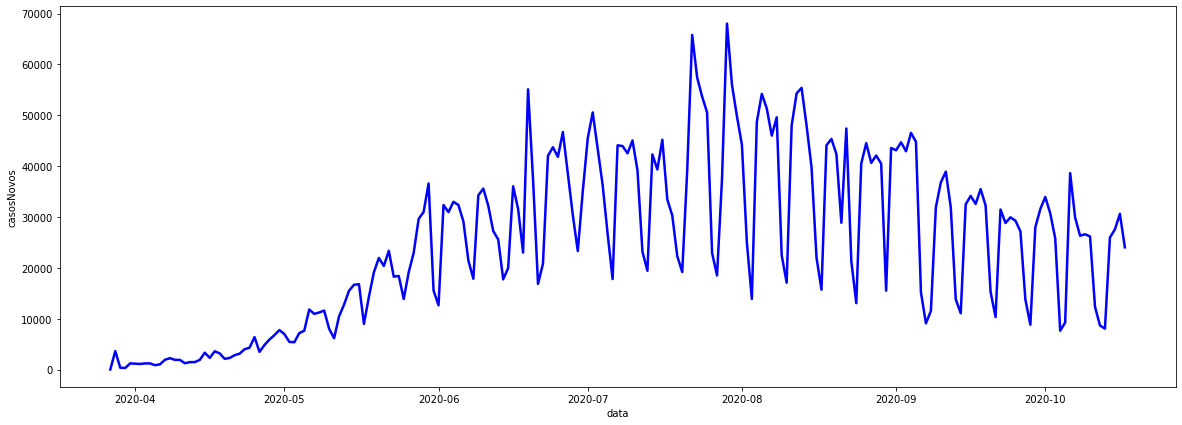

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 7)
sns.lineplot(x=grupoData.index, y=grupoData['casosNovos'],palette="tab10", linewidth=2.5, color="blue")

In [ ]:
#Plotagem da evolução do número de óbitos

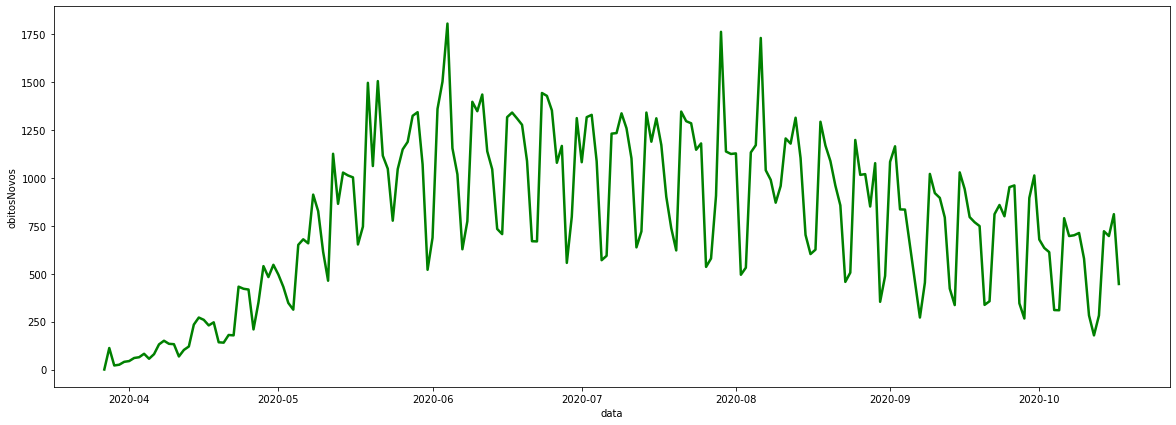

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 7)
sns.lineplot(x=grupoData.index, y=grupoData['obitosNovos'],palette="tab10", linewidth=2.5, color="green")

In [ ]:
#Plotagem do índice de mortalidade

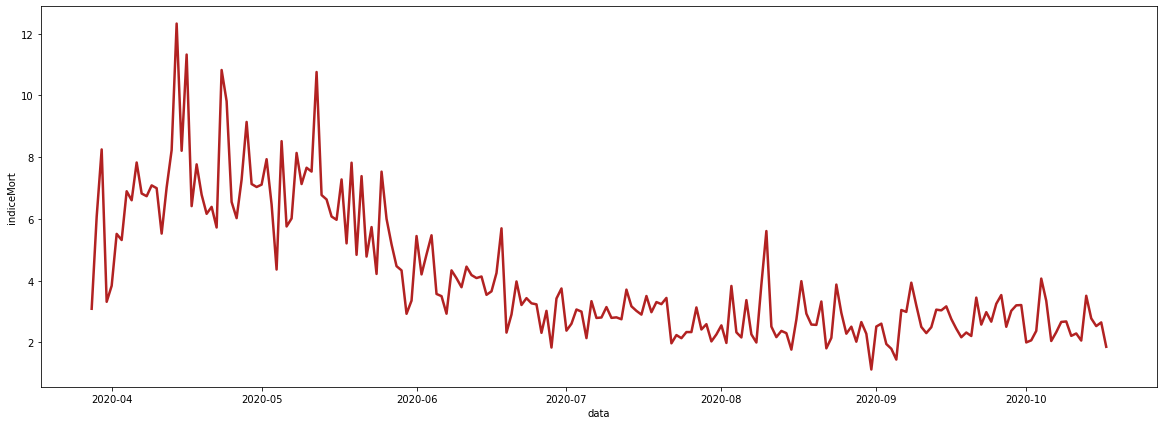

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 7)
sns.lineplot(x=grupoData.index, y=grupoData['indiceMort'],palette="tab10", linewidth=2.5, color="firebrick")

In [ ]:
#Ocorrência de novos casos por estado

In [ ]:
df_grafEvEstadoCasos = dfCovid.groupby('estado').sum().sort_values(by='estado', ascending=True)['casosNovos']

In [ ]:
df_grafEvEstadoCasos = pd.Series.to_frame(df_grafEvEstadoCasos).reset_index()

In [ ]:
df_grafEvEstadoCasos

,estado,casosNovos
0,AC,30299
1,AL,138310
2,AM,154435
3,AP,50247
4,BA,369484
5,CE,299529
6,ES,144330
7,GO,7097
8,MA,200990
9,MG,358550


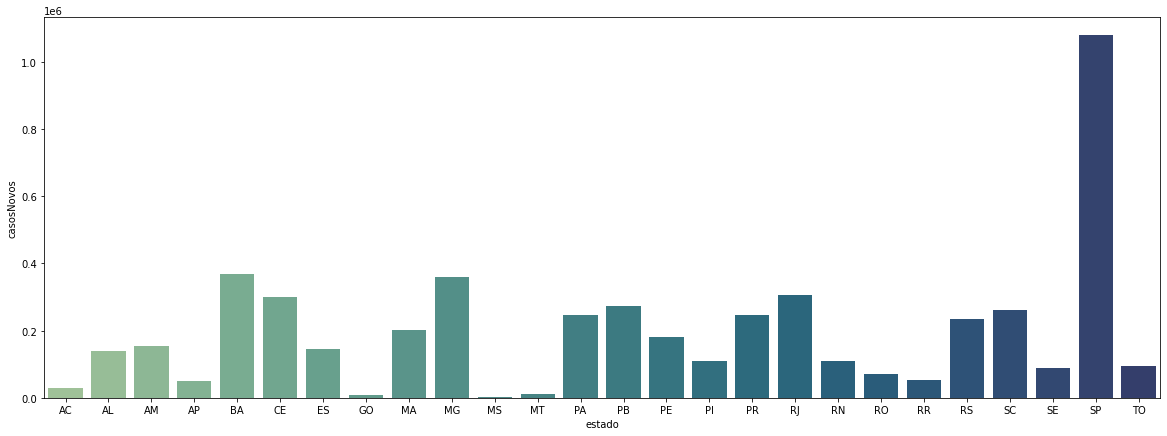

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 7)
sns.barplot(x=df_grafEvEstadoCasos['estado'], y=df_grafEvEstadoCasos['casosNovos'], palette="crest", linewidth=3.5, color="darkgreen")

In [ ]:
#Carregamento da base de dados de georrefrenciamento

In [ ]:
mapa = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Novo/bcim_2016_21_11_2018.gpkg', layer='lim_unidade_federacao_a')

/usr/local/lib/python3.6/dist-packages/geopandas/geodataframe.py:522: RuntimeWarning:

Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.



In [ ]:
#Teste da base de dados

In [ ]:
print(mapa.nome[2])

Paraná


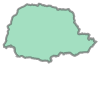

In [ ]:
mapa.geometry[2]

In [ ]:
mapa.rename(columns={'sigla':'estado'}, inplace=True)

In [ ]:
estadosCovid = mapa.merge(df_grafEvEstadoCasos, on='estado', how='left')

In [ ]:
estadosCovid = estadosCovid[['estado','casosNovos','geometry']]

In [ ]:
estadosCovid

,estado,casosNovos,geometry
0,GO,7097.0,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743..."
1,MS,3419.0,"MULTIPOLYGON (((-56.09815 -17.17220, -56.09159..."
2,PR,245403.0,"MULTIPOLYGON (((-52.08090 -22.52893, -52.04903..."
3,MG,358550.0,"MULTIPOLYGON (((-44.21152 -14.22955, -44.20750..."
4,SE,88668.0,"MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ..."
5,AL,138310.0,"MULTIPOLYGON (((-35.45878 -8.81780, -35.45898 ..."
6,TO,93436.0,"MULTIPOLYGON (((-48.34644 -5.17871, -48.34311 ..."
7,RR,54163.0,"MULTIPOLYGON (((-60.17793 5.23024, -60.16619 5..."
8,AM,154435.0,"MULTIPOLYGON (((-67.32285 2.04176, -67.29220 1..."
9,AC,30299.0,"MULTIPOLYGON (((-73.73811 -7.13471, -72.90246 ..."


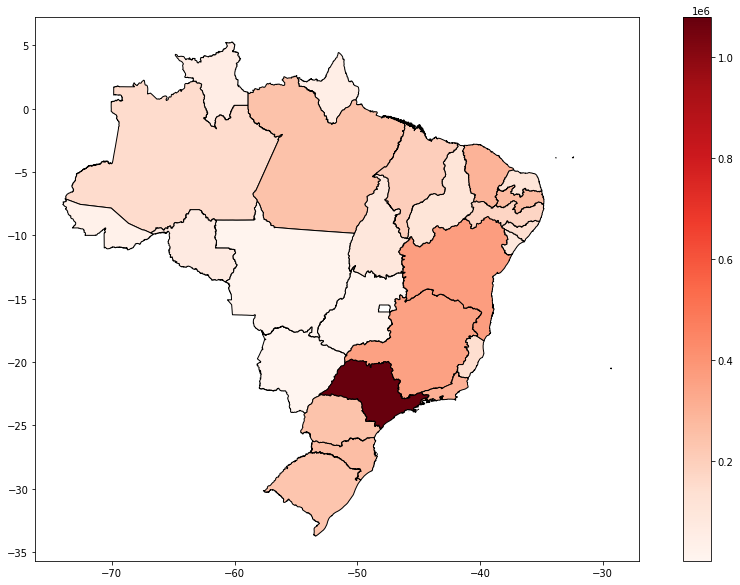

In [ ]:
estadosCovid.plot(column='casosNovos', cmap='Reds', figsize=(16,10), legend=True, edgecolor='black')